In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("diabetes1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.shape

(768, 9)

In [19]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
y_train

307    0
186    1
25     1
42     0
457    0
      ..
423    0
296    1
149    0
371    0
154    1
Name: Outcome, Length: 614, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
y_test

164    1
350    0
426    0
262    0
670    0
      ..
535    1
450    0
364    0
213    1
74     0
Name: Outcome, Length: 154, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.7337662337662337

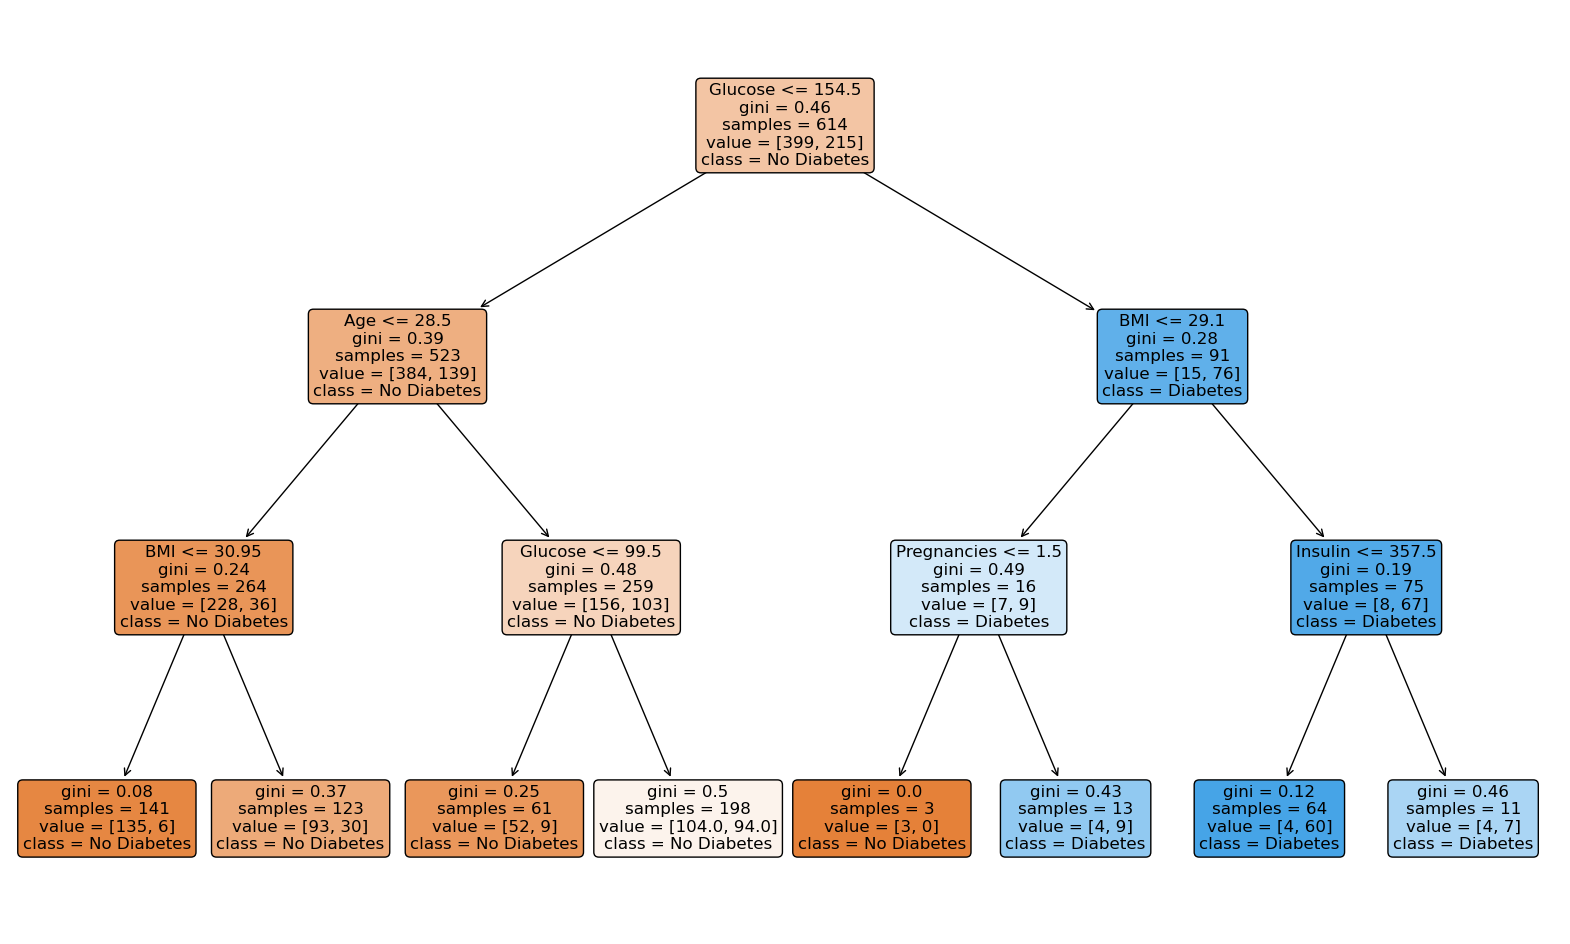

In [29]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=["No Diabetes", "Diabetes"],
    rounded=True,fontsize=12,precision=2)
plt.show()
# filled=true colours node in tree(dark means confident decision)

## Confusion Matrix

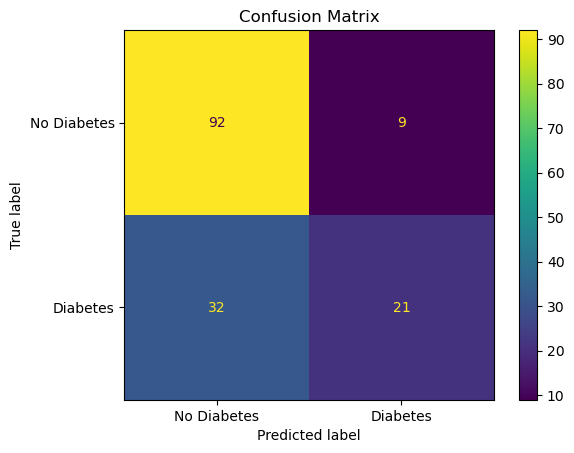

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

##  Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.74      0.91      0.82       101
    Diabetes       0.70      0.40      0.51        53

    accuracy                           0.73       154
   macro avg       0.72      0.65      0.66       154
weighted avg       0.73      0.73      0.71       154



## Feature Importance

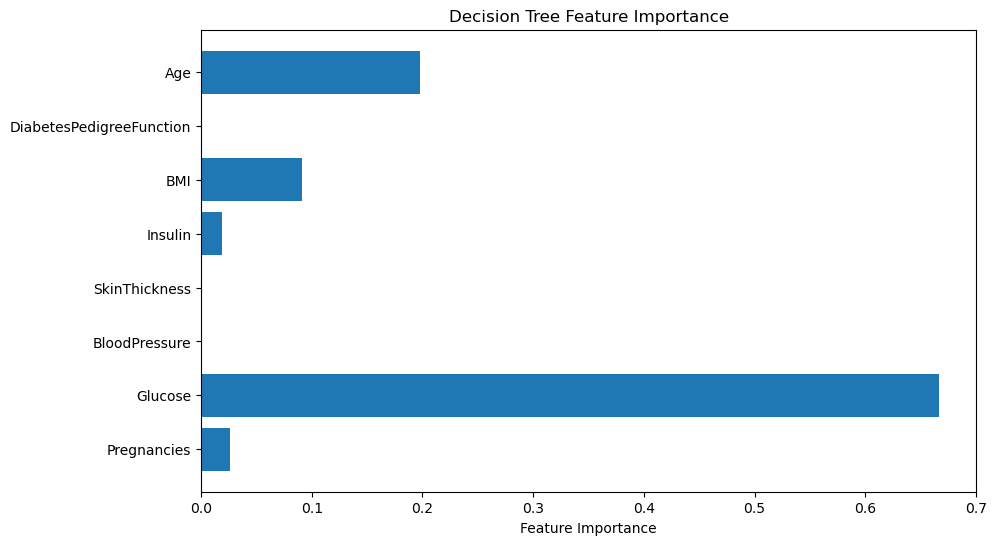

In [35]:
importances = clf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()